In [107]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [108]:
df = pd.read_csv("TMDB_movie_dataset_v11.csv")
df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili"
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,en,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin"
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish"
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,en,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian"


In [109]:
df.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages'],
      dtype='object')

## Cleaning Data

Dropping columns that are not very interesting

In [110]:
df.drop(columns=['id', 'backdrop_path', 'poster_path', 'tagline', 'overview', 'homepage', 'imdb_id'], inplace=True)
df.head()

,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,original_language,original_title,popularity,genres,production_companies,production_countries,spoken_languages
0,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,160000000,en,Inception,83.952,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili"
1,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,165000000,en,Interstellar,140.241,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English
2,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,185000000,en,The Dark Knight,130.643,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin"
3,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,237000000,en,Avatar,79.932,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish"
4,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,220000000,en,The Avengers,98.082,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian"


Dropping NA

In [111]:
df = df.dropna()

Changing release date to release year. It's more relevant

In [112]:
df['release_date'] = df['release_date'].apply(lambda x: int(x.split('-')[0]))
df.rename(columns={'release_date':'release_year'}, inplace=True)

Just want to know about the already released movies

In [113]:
df = df.loc[df['status'] == 'Released']

In [114]:
df['release_year'].describe()

count    290551.000000
mean       1993.097756
std          28.923674
min        1887.000000
25%        1975.000000
50%        2005.000000
75%        2017.000000
max        2025.000000
Name: release_year, dtype: float64

Multiplied vote average to 100, so the vote average and vote count can appear in the same graph

In [115]:
df['vote_average*100'] = df['vote_average'].apply(lambda x: x*100)

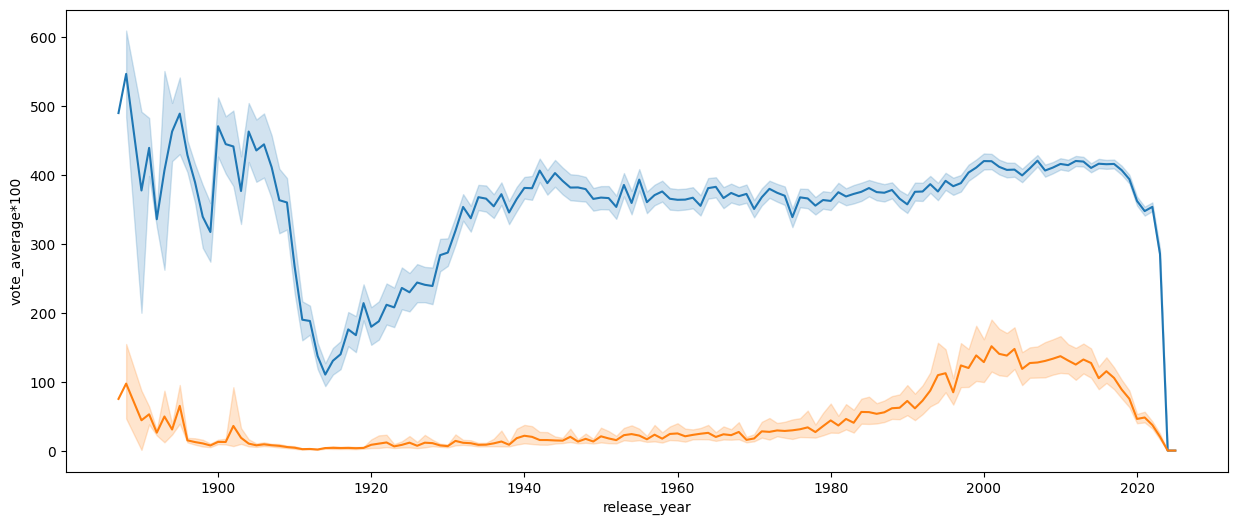

In [116]:
plt.figure(figsize=(15,6))

ax = sns.lineplot(data= df, x='release_year', y='vote_average*100')
aax = sns.lineplot(data= df, x='release_year', y='vote_count')


plt.show()

An interesting cut on the dataframe would be the movie from 1990 to 2020, that are movies with high number of votes and high average score. And another nice cut would be from 1910 and below, analysing the behave of the curves about those movies could be very interesting.

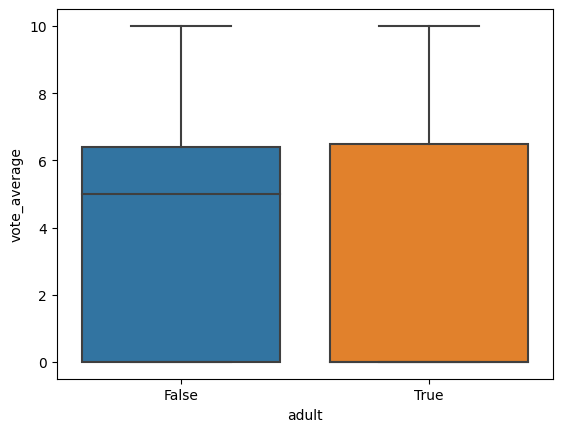

In [117]:
ax = sns.boxplot(data= df, x= 'adult', y='vote_average')

plt.show()

We can see that movies tagged with Adult have the same average score as the ones that are not tagged Adult

## Analysing Recent Movies (1990 - 2020)

In [118]:
recent = df.loc[(df['release_year'] >= 1990) & (df['release_year']<= 2020)]
recent.head()

,title,vote_average,vote_count,status,release_year,revenue,runtime,adult,budget,original_language,original_title,popularity,genres,production_companies,production_countries,spoken_languages,vote_average*100
0,Inception,8.364,34495,Released,2010,825532764,148,False,160000000,en,Inception,83.952,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili",836.4
1,Interstellar,8.417,32571,Released,2014,701729206,169,False,165000000,en,Interstellar,140.241,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,841.7
2,The Dark Knight,8.512,30619,Released,2008,1004558444,152,False,185000000,en,The Dark Knight,130.643,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin",851.2
3,Avatar,7.573,29815,Released,2009,2923706026,162,False,237000000,en,Avatar,79.932,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish",757.3
4,The Avengers,7.710,29166,Released,2012,1518815515,143,False,220000000,en,The Avengers,98.082,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian",771.0
